In [1]:
## Importing the dependencies.
import os
os.chdir('/Users/bondino/Dropbox/data_science/Mis Proyectos/segment_anything')
from segment_anything import SamPredictor, sam_model_registry
import numpy as np
import matplotlib.pyplot as plt
import cv2 

In [2]:
## Defining the mask and the points
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([0/255, 255/255, 0/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=200):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='.', s=marker_size, edgecolor='white', linewidth=1)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='.', s=marker_size, edgecolor='white', linewidth=1)  

In [3]:
## Importing an image
'''Here goes the code to import an image from the browser'''
image = cv2.imread('casa.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
## Uploading the model obtained from SAM github
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

predictor = SamPredictor(sam)
predictor.set_image(image)

In [10]:
## Giving input points and input label
## input point are the coordinates that the user want to segment
## input label are the boolean of the segment. 1 for consider this to segment;  for dont consider to segment.
'''Here goes the code to set the input point and input label based on the input given'''
input_point = np.array([[50,65]])
input_label = np.array([1])

In [11]:
## Using the code with the input point and input label given
masks, scores, logits = predictor.predict(
point_coords=input_point,
point_labels=input_label,
multimask_output=True,
)

mask_input = logits[np.argmax(scores), :, :]  

masks, _, _ = predictor.predict(
point_coords=input_point,
point_labels=input_label,
mask_input=mask_input[None, :, :],
multimask_output=False,
)

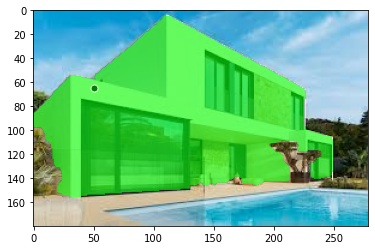

In [12]:
## Plot the image, the mask and the point given by the input.
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

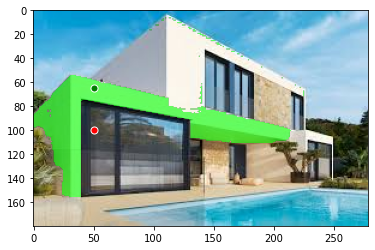

In [8]:
## Giving input points and input label
## input point are the coordinates that the user want to segment
## input label are the boolean of the segment. 1 for consider this to segment;  for dont consider to segment.
'''Here goes the code to set the input point and input label based on the input given'''
input_point = np.array([[50,65],[50,100]])
input_label = np.array([1,0])

## Using the code with the input point and input label given
masks, scores, logits = predictor.predict(
point_coords=input_point,
point_labels=input_label,
multimask_output=True,
)

mask_input = logits[np.argmax(scores), :, :]  

masks, _, _ = predictor.predict(
point_coords=input_point,
point_labels=input_label,
mask_input=mask_input[None, :, :],
multimask_output=False,
)

## Plot the image, the mask and the point given by the input.
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

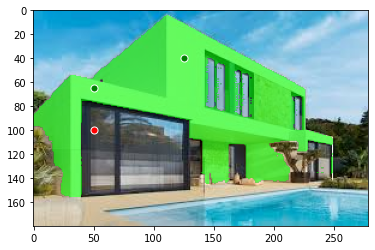

In [9]:
## Giving input points and input label
## input point are the coordinates that the user want to segment
## input label are the boolean of the segment. 1 for consider this to segment;  for dont consider to segment.
'''Here goes the code to set the input point and input label based on the input given'''
input_point = np.array([[50,65],[50,100],[125,40]])
input_label = np.array([1,0,1])

## Using the code with the input point and input label given
masks, scores, logits = predictor.predict(
point_coords=input_point,
point_labels=input_label,
multimask_output=True,
)

mask_input = logits[np.argmax(scores), :, :]  

masks, _, _ = predictor.predict(
point_coords=input_point,
point_labels=input_label,
mask_input=mask_input[None, :, :],
multimask_output=False,
)

## Plot the image, the mask and the point given by the input.
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()